In [6]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
model_code_dir = os.path.join(parent_dir, 'src')
if model_code_dir not in sys.path:
    sys.path.append(model_code_dir)

import exp_env as env
import copy
import pickle

Modules imported successfully


In [7]:
# Define the path to the gpickle file
input_file = '../network_data/g_ba.gpickle'

# Load the graph from the gpickle file
try:
    with open(input_file, 'rb') as f:
        G = pickle.load(f)
    print("Graph loaded successfully")
except Exception as e:
    print(f"Error loading graph: {e}")

# Verify the loaded graph
print(G)

Graph loaded successfully
Graph with 2000 nodes and 3996 edges


In [8]:
num_influencers = 100
influencers_cascade_steps = 5

model = env.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')
num_edges = G.number_of_edges()

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 904
Number of deinfluenced nodes: 0
Number of susceptible nodes: 1096
influencer {5, 1544, 1551, 1041, 1555, 541, 1566, 1567, 32, 1057, 1058, 36, 551, 1582, 1080, 573, 62, 574, 577, 1606, 80, 1107, 595, 1633, 102, 1137, 625, 633, 132, 1672, 649, 1170, 1172, 1696, 676, 685, 175, 1713, 689, 190, 1218, 196, 1225, 204, 1228, 207, 1241, 219, 1758, 224, 1253, 233, 238, 1774, 1782, 252, 1793, 1303, 282, 1309, 287, 1318, 1832, 1838, 312, 316, 1343, 835, 836, 1869, 1872, 1873, 1361, 1885, 878, 369, 1396, 1911, 1913, 385, 1935, 1936, 401, 420, 933, 1959, 1965, 431, 943, 441, 442, 1982, 964, 1989, 978, 993, 1508, 1510, 1513, 1518}


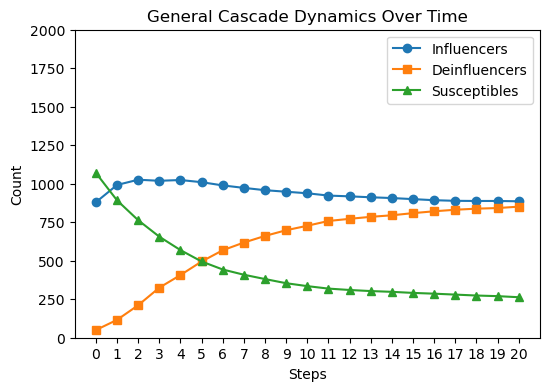

In [9]:
# Run the cascade and record the results
influencer_counts, deinfluencer_counts, susceptible_counts = env.run_cascade_with_recording(model_fixed_influencers, num_deinfluencers=50, steps = 20)

# Plot the results
env.plot_cascade_results(influencer_counts, deinfluencer_counts, susceptible_counts)